In [1]:
import numpy as np
import matplotlib.pyplot as plt
%precision 3

'%.3f'

In [2]:
def inv_cauchy_cdf(y, a):
    b = 1
    return(a + b * np.tan(np.pi * (y - 0.5)))

def make_data(a, n):
    b = 1
    ys = np.random.rand(n)
    return(inv_cauchy_cdf(ys, a))

In [3]:
def p_xk_given_a(xk, a):
    b = 1
    return(b / (np.pi * (b**2 + (xk - a)**2)))

In [4]:
def pdf_95_region_ii(pdf):
    norm_cdf = np.cumsum(pdf)
    norm_cdf = norm_cdf / max(norm_cdf)
    return([np.argmax(norm_cdf > 0.025), np.argmax(norm_cdf > 0.975)])

In [5]:
a_test = 20 * np.random.rand() - 10;
print(a_test)

2.68306307818815


2.070139513027236
2.4933530642014405


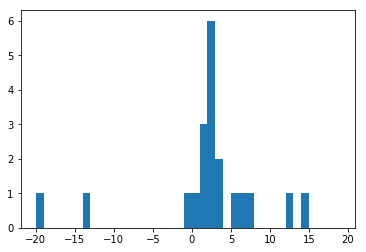

In [11]:
n = 20
xk_data = make_data(a_test, n)
# print(xk_data)
print(np.mean(xk_data))
print(np.median(xk_data))
plt.hist(xk_data, np.arange(-20, 20));
plt.show()

In [12]:
a_list = np.arange(0, 15, 0.01);
posterior_pdf = [sum(np.log(p_xk_given_a(xk_data, a))) for a in a_list]
posterior_pdf = np.exp(posterior_pdf - max(posterior_pdf))
posterior_max = a_list[np.argmax(posterior_pdf)]
print(posterior_max)
[pdf_95_minii, pdf_95_maxii] = pdf_95_region_ii(posterior_pdf)
print(a_list[[pdf_95_minii, pdf_95_maxii]])

2.48
[1.79 3.18]


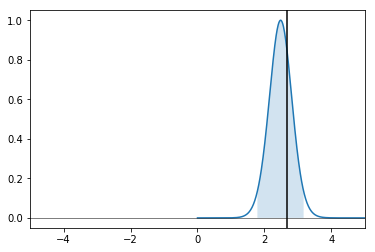

In [13]:
plt.plot(a_list, posterior_pdf)
plt.axvline(x=a_test, color='k')
plt.axhline(y=0, color='k', linewidth=1, alpha=0.5)
plt.fill_between(a_list[pdf_95_minii:pdf_95_maxii],
                 posterior_pdf[pdf_95_minii:pdf_95_maxii],
                alpha = 0.2)
plt.xlim(-5,5)
plt.show()